# Business Case: Aerofit - Descriptive Statistics & Probability

### Introduction
### 1. Defining Problem Statement and Analysing basic metrics

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

We have aerofit dataset  on individuals who purchased a treadmill from the AeroFit stores during the prior three months.

Product Portfolio:

* The KP281 is an entry-level treadmill that sells for \\$1,500.
* The KP481 is for mid-level runners that sell for \\$1,750.
* The KP781 treadmill is having advanced features that sell for $2,500.

### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
* For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [67]:
# import requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [68]:
# Import the dataset
df=pd.read_csv('D:/Jupyter/aerofit EDA/aerofit.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


### 1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [69]:
# Checking shape of the data
df.shape

(180, 9)

Insights - 

* Now we know that there are 180 product purchase details and and 9 attributes for each purchase.

In [70]:
# 5 point statistical summary
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Insights - 

* Huge difference in income for customers who purchase treadmills. Ranging between USD 29562 to 104581.
* Minumim and maximum age of customer is 18 yrs and 50 yrs, mean is 28 yrs and 75 % of the people have ages less than or equal to 33 yrs
* 75 % of the people have education <= 16 yrs

In [71]:
# coulumn details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Insights - 

* Product, Gender and MaritalStatus are categorial variables. Hence updating the dtype for same.

In [72]:
df['Product']=df['Product'].astype('category')
df['MaritalStatus']=df['MaritalStatus'].astype('category')
df['Gender']=df['Gender'].astype('category')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [74]:
### Inspecting duplicate and null values

In [75]:
# check if any duplicates
df[df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


Insights - 
* We can see that there is no duplicates rows in the dataset

In [76]:
# check if any null value
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Insights - 

* We can see that there is no null values in the dataset

## 2.  Non-Graphical Analysis: Value counts and unique attributes 

In [77]:
# No. of unique values for each feature
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [78]:
# unique values for each features
df['Product'].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [79]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [80]:
df['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [81]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [82]:
df['MaritalStatus'].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [83]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [84]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [85]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [86]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

In [87]:
# # unique values with count for each features
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [88]:
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [89]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [90]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [91]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [92]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [93]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [94]:
df['Income'].value_counts()

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [95]:
df['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

Non-Graphical Analysis Summary:

* Now we know that there are 180 product purchase details and and 9 attributes for each purchase.
* There is no duplicate rows or mising value in the data
* Huge difference in income for customers who purchase treadmills. Ranging between USD 29562 to 104581.
* Minumim and maximum age of customer is 18 yrs and 50 yrs, mean is 28 yrs and 75 % of the people have ages less than 33 yrs
* 104 persons are male and 76 female
* 107 are married/partnered and 73 are single.
* 75 % of the people have education <= 16 yrs
* Product KP281 is the most frequently purchase wth no's as 80 followed by 481 and 781 with 60 and 40 count respectively

In [96]:
# We can add tow new columns inorder to understand the age and income range for better analysis.
# lets create bins for age category and income category
df['Income Group']=pd.cut(df['Income'], bins=[29000,40000,60000,80000,105000],
                          labels=['Lower','Lower_Middle','Upper_Middle','High'])

In [97]:
# 0-21 -> Teen
# 22-35 -> Adult
# 36-45 -> Middle Age
# 46-60 -> Elder Age
df['Age_group'] = pd.cut(df['Age'],bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])

In [98]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Group,Age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Lower,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Lower,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Lower,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Lower,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Lower,Teen
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,High,Middle Aged
176,KP781,42,Male,18,Single,5,4,89641,200,High,Middle Aged
177,KP781,45,Male,16,Single,5,5,90886,160,High,Middle Aged
178,KP781,47,Male,18,Partnered,4,5,104581,120,High,Elder


<AxesSubplot: ylabel='Education'>

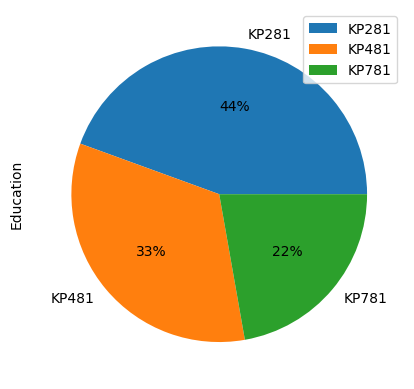

In [99]:
#Statistical Summary using Pie chart
df.groupby(['Product']).count().plot(kind='pie',y='Education',autopct='%1.0f%%')


Insights-

* 44.44% of customers bought KP281 product type
* 33.33% of customers bought KP481 product type
* 22.22% of customers bought KP781 product type

<AxesSubplot: ylabel='Education'>

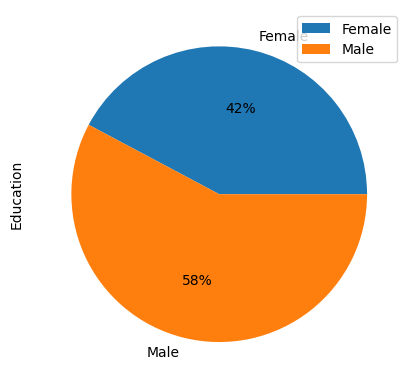

In [100]:
df.groupby(['Gender']).count().plot(kind='pie',y='Education',autopct='%1.0f%%')

* 58% of customers are Male and 42% customers are Female

<AxesSubplot: ylabel='Education'>

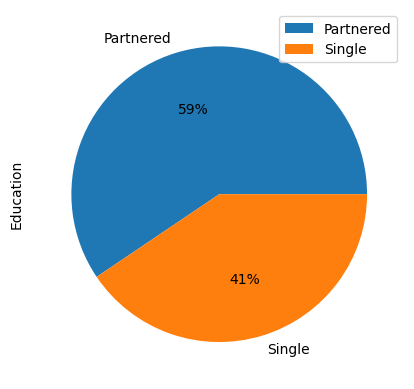

In [101]:
df.groupby(['MaritalStatus']).count().plot(kind='pie',y='Education',autopct='%1.0f%%')

* 59% of customers are Married/Partnered
* 41% of customers are Single

In [102]:
#The average number of times the customer plans to use the treadmill each week.
total_usage=df['Usage'].count()
grouped_data=df.groupby('Usage')['Age'].count()
perc_usage_breakup= (grouped_data/total_usage)*100
perc_usage_breakup

Usage
2    18.333333
3    38.333333
4    28.888889
5     9.444444
6     3.888889
7     1.111111
Name: Age, dtype: float64

* 38% of customers use 3 days per week
* Approx 1% of customers use 7 days per week

In [103]:
# Customer Self-rated fitness on a 1-to-5 scale
total_fitness_rating=df['Fitness'].count()
grouped_data=df.groupby('Fitness')['Age'].count()
perc_usage_breakup= (grouped_data/total_usage)*100
perc_usage_breakup

Fitness
1     1.111111
2    14.444444
3    53.888889
4    13.333333
5    17.222222
Name: Age, dtype: float64

* 53% of customers have rated themselves as 3
* 15% of customers have rated their fitness less than 3
* Over 30% of customers have have rated their fitness 4 and above

## 3. Visual Analysis - Univariate & Bivariate

### 3.1 For continuous variable(s): 
#### Distplot

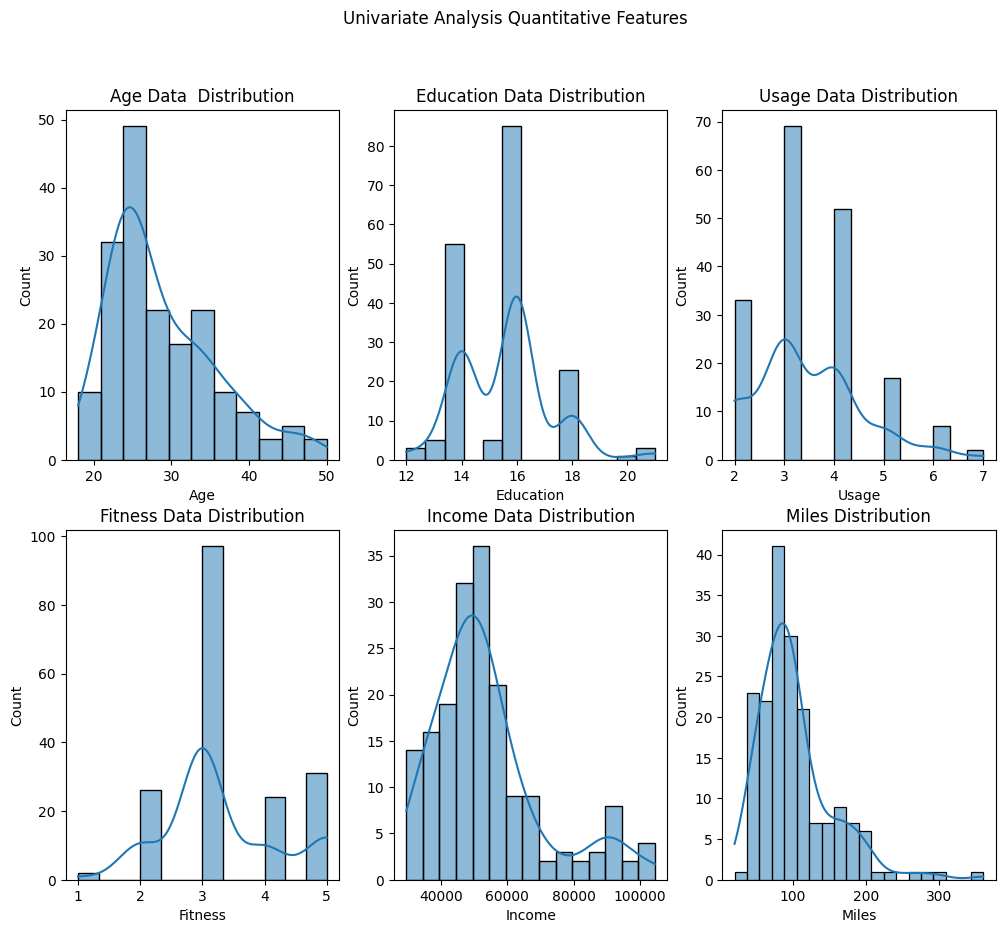

In [104]:
# Lets work on quantitative features and understand the distributions
fig=plt.figure(figsize=(12,10))
plt.subplot(2,3,1)
sns.histplot(data=df,x='Age',kde=True)
plt.title("Age Data  Distribution")

plt.subplot(2,3,2)
sns.histplot(data=df,x='Education',kde=True)
plt.title("Education Data Distribution")

plt.subplot(2,3,3)
sns.histplot(data=df,x='Usage',kde=True)
plt.title("Usage Data Distribution")

plt.subplot(2,3,4)
sns.histplot(data=df,x='Fitness',kde=True)
plt.title("Fitness Data Distribution")

plt.subplot(2,3,5)
sns.histplot(data=df,x='Income',kde=True)
plt.title("Income Data Distribution")

plt.subplot(2,3,6)
sns.histplot(data=df,x='Miles',kde=True)
plt.title("Miles Distribution")

plt.suptitle("Univariate Analysis Quantitative Features")
plt.show()

Insights- 

* Majority of customer are of the age 20-30 Yrs.
* Highest number of customers have 16 as their Education followed by 14. 20 is the least
* 3 days per week is the most common usage among the customers
* Most of customers have rated 3  for fitness rating
* More than 35 customers earn 50-55K per year
* More than 30 customers earn 45-50K per year
* More than 20 customers earn 55-60K per year
* Most number of miles the customer expects to walk/run each week is > 40

#### countplot

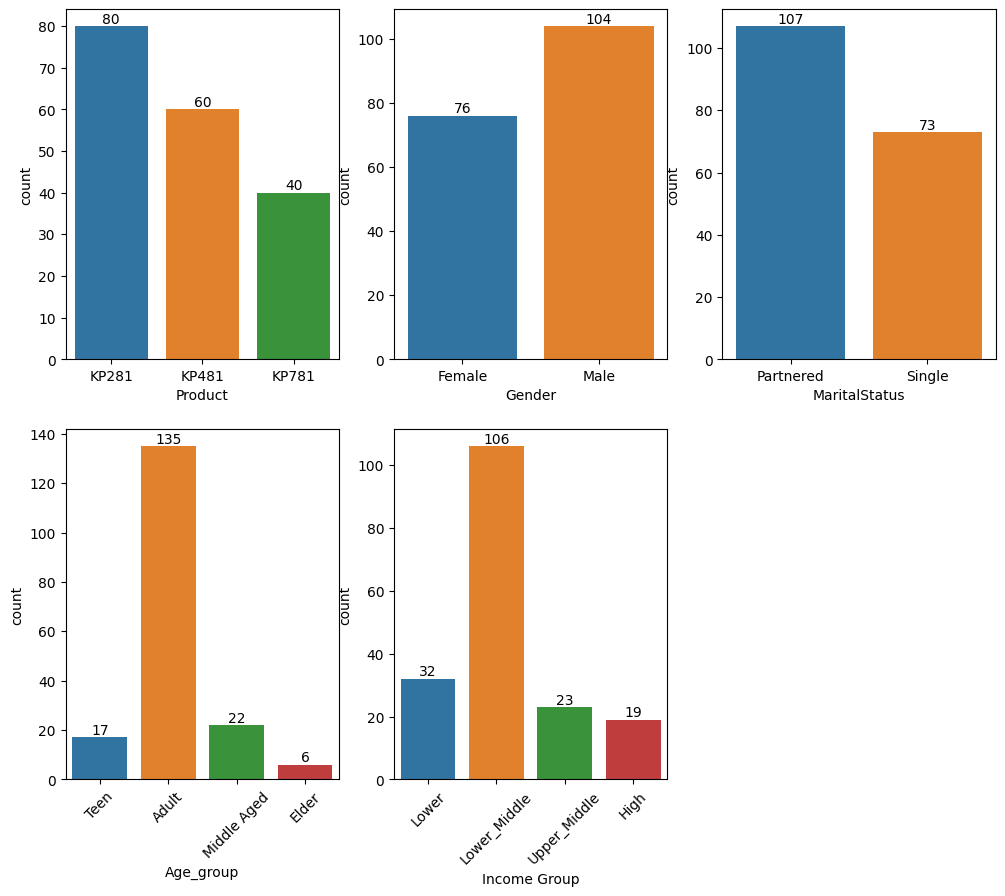

In [105]:
fig=plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
ax=sns.countplot(data=df,x='Product')
ax.bar_label(ax.containers[0])

plt.subplot(2,3,2)
ax=sns.countplot(data=df,x='Gender')
ax.bar_label(ax.containers[0])

plt.subplot(2,3,3)
ax=sns.countplot(data=df,x='MaritalStatus')
ax.bar_label(ax.containers[0])

plt.subplot(2,3,4)
ax=sns.countplot(data=df,x='Age_group')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)

plt.subplot(2,3,5)
ax=sns.countplot(data=df,x='Income Group')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)




plt.show()

Insights - 

* Most Selling product is KP281 with 80 no's followed by KP481 and KP 781 with count 60 and 40 respectively
* There are more male(104) purchaser than female(76)
* More partnered(107) people are there in the data compared to single(73)
* Most customers are on age group of 18-30 yrs compared to 30-40 yrs followed by 40-60 yrs.
* Income slab of \\$ 40k- $60k people are more in the data

### 3.2 For categorical variable(s): Boxplot 

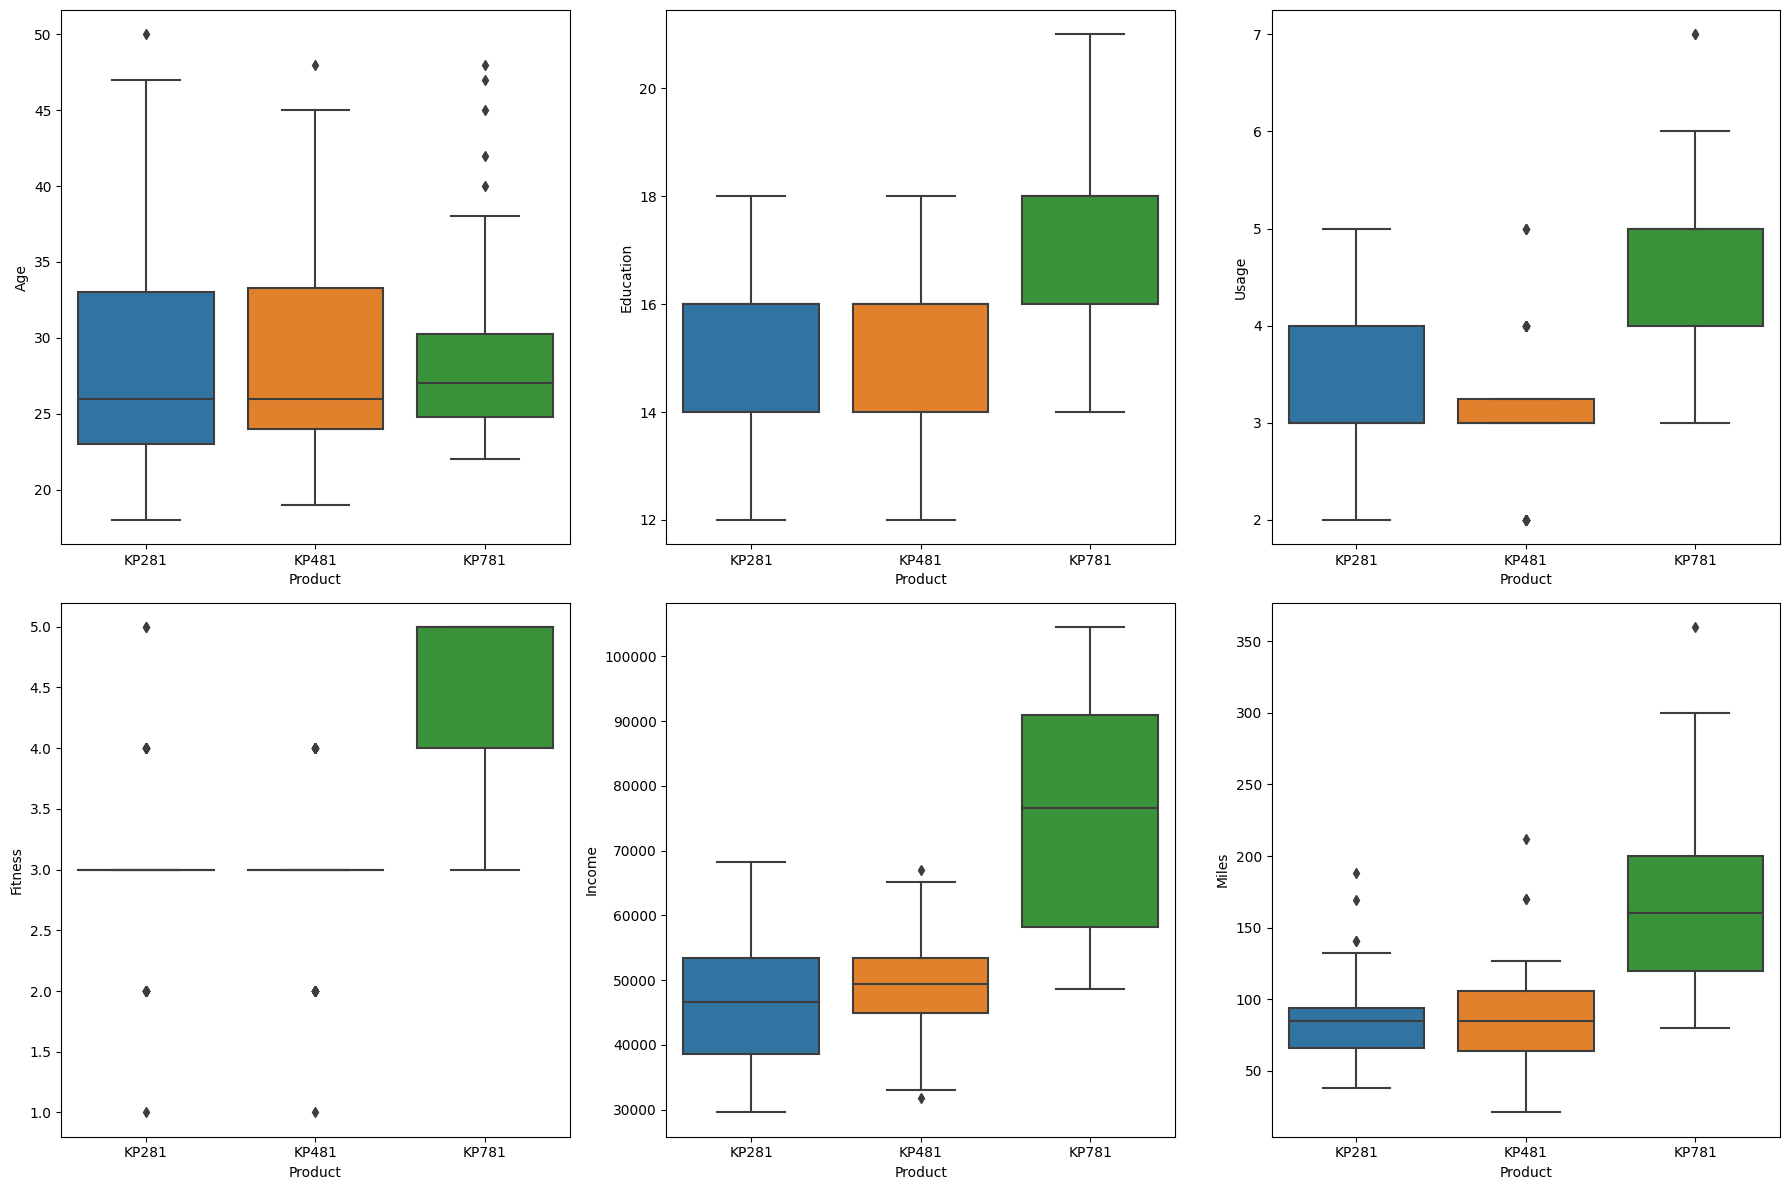

In [106]:
# Product Variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
sns.boxplot(x="Product", y="Age", data=df, ax=axes[0, 0])
sns.boxplot(x="Product", y="Education", data=df, ax=axes[0, 1])
sns.boxplot(x="Product", y="Usage", data=df, ax=axes[0, 2])
sns.boxplot(x="Product", y="Fitness", data=df, ax=axes[1, 0])
sns.boxplot(x="Product", y="Income", data=df, ax=axes[1, 1])
sns.boxplot(x="Product", y="Miles", data=df, ax=axes[1, 2])
plt.tight_layout()


plt.show()

Insights-

* Customer purchasing KP281 and KP481 are in the same age group
* Customer purchasing KP781 are in most likely in the age group of 25-30
* Customer having education > 16 are more likely to buy KP781
* Customer having educatin < 16 have equal chance of purchasing KP281 and KP481
* Customer usage plan > 4 times a week are more likely to purchase KP781
* Customer usage plan < 4 times a week are more likely to purchase KP281 and KP481
* Customer having fitness > 4 are more likely to purchase KP781
* Customer having income > 60000 are more likely to purchase KP781
* Customer having income < 60000  more likely to purchase KP281 and KP481
* Customer expecting to walk/run > 120 miles per week are more likely to purchase KP781 and rest KP281/KP481


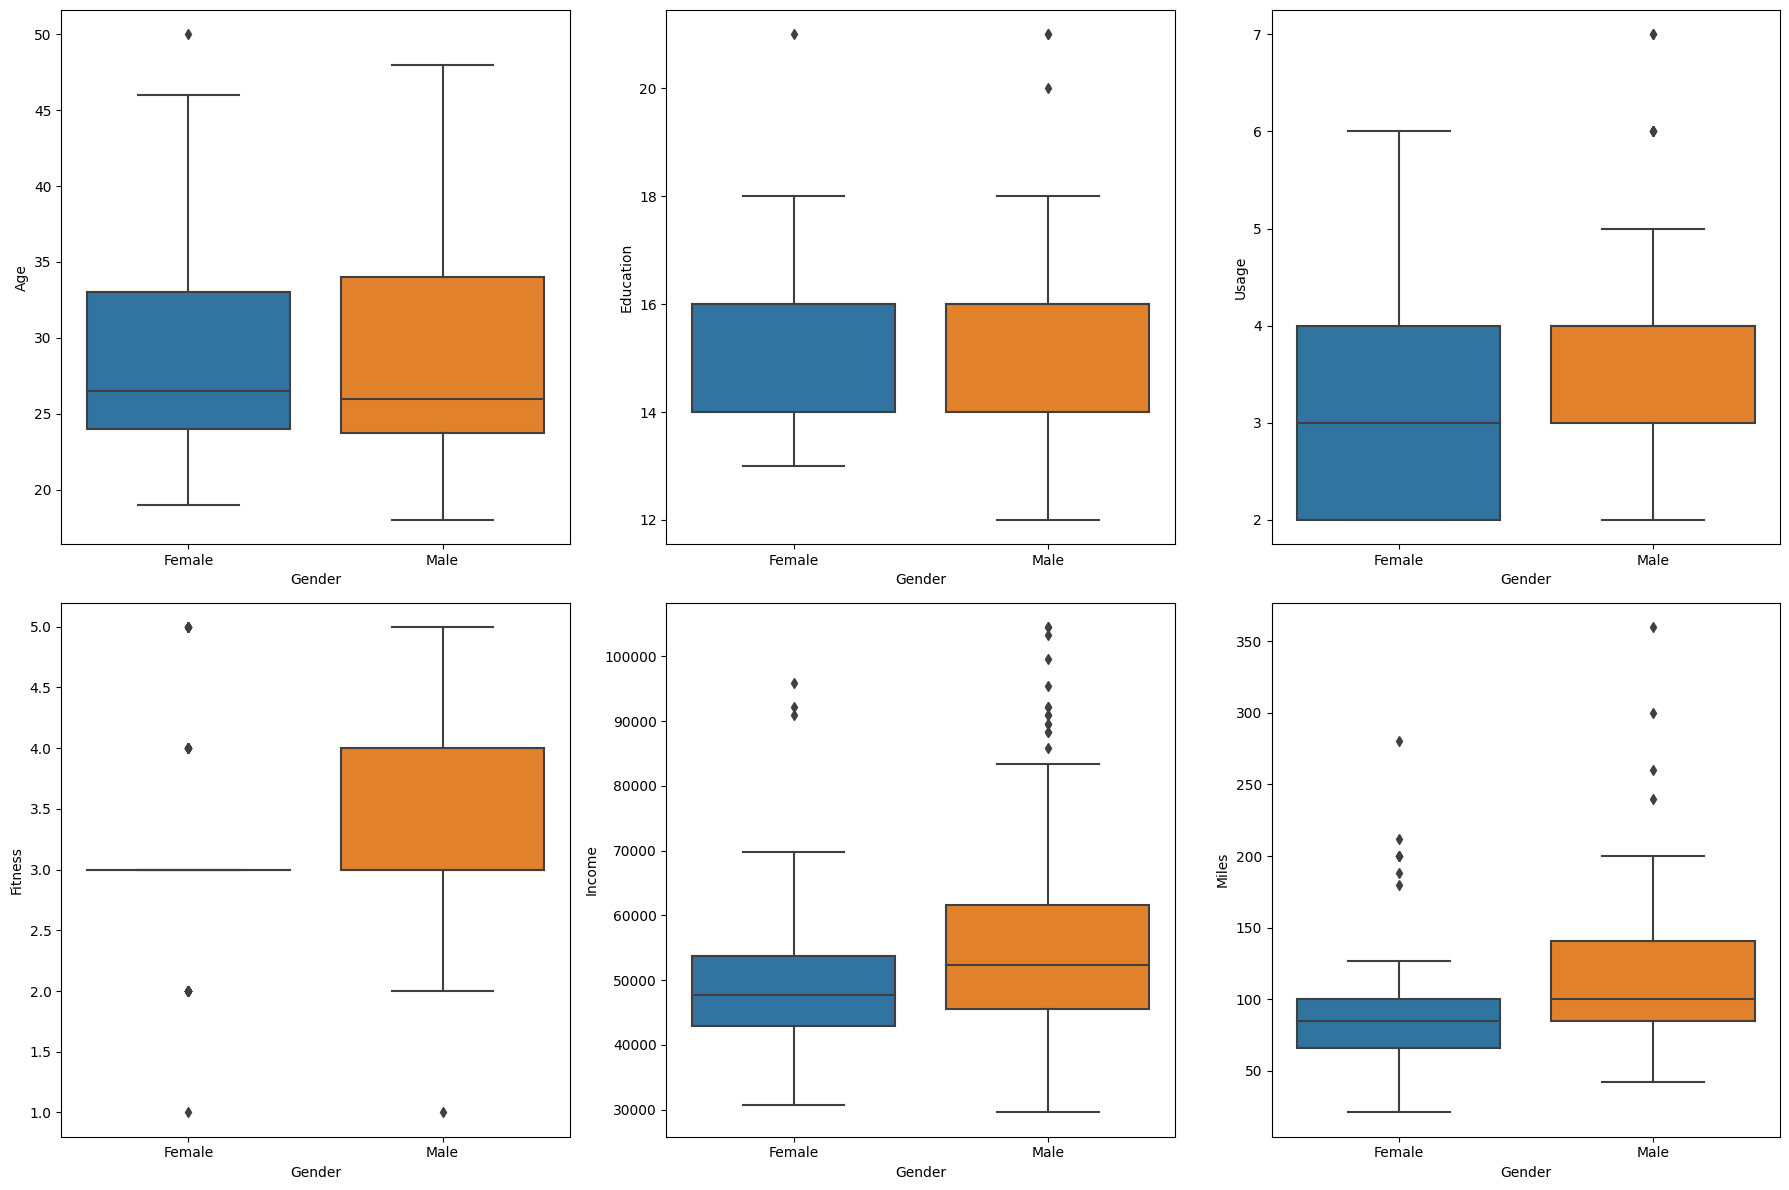

In [107]:
# Gender Variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
sns.boxplot(x="Gender", y="Age", data=df, ax=axes[0, 0])
sns.boxplot(x="Gender", y="Education", data=df, ax=axes[0, 1])
sns.boxplot(x="Gender", y="Usage", data=df, ax=axes[0, 2])
sns.boxplot(x="Gender", y="Fitness", data=df, ax=axes[1, 0])
sns.boxplot(x="Gender", y="Income", data=df, ax=axes[1, 1])
sns.boxplot(x="Gender", y="Miles", data=df, ax=axes[1, 2])
plt.tight_layout()


plt.show()

### Multivariate Analysis

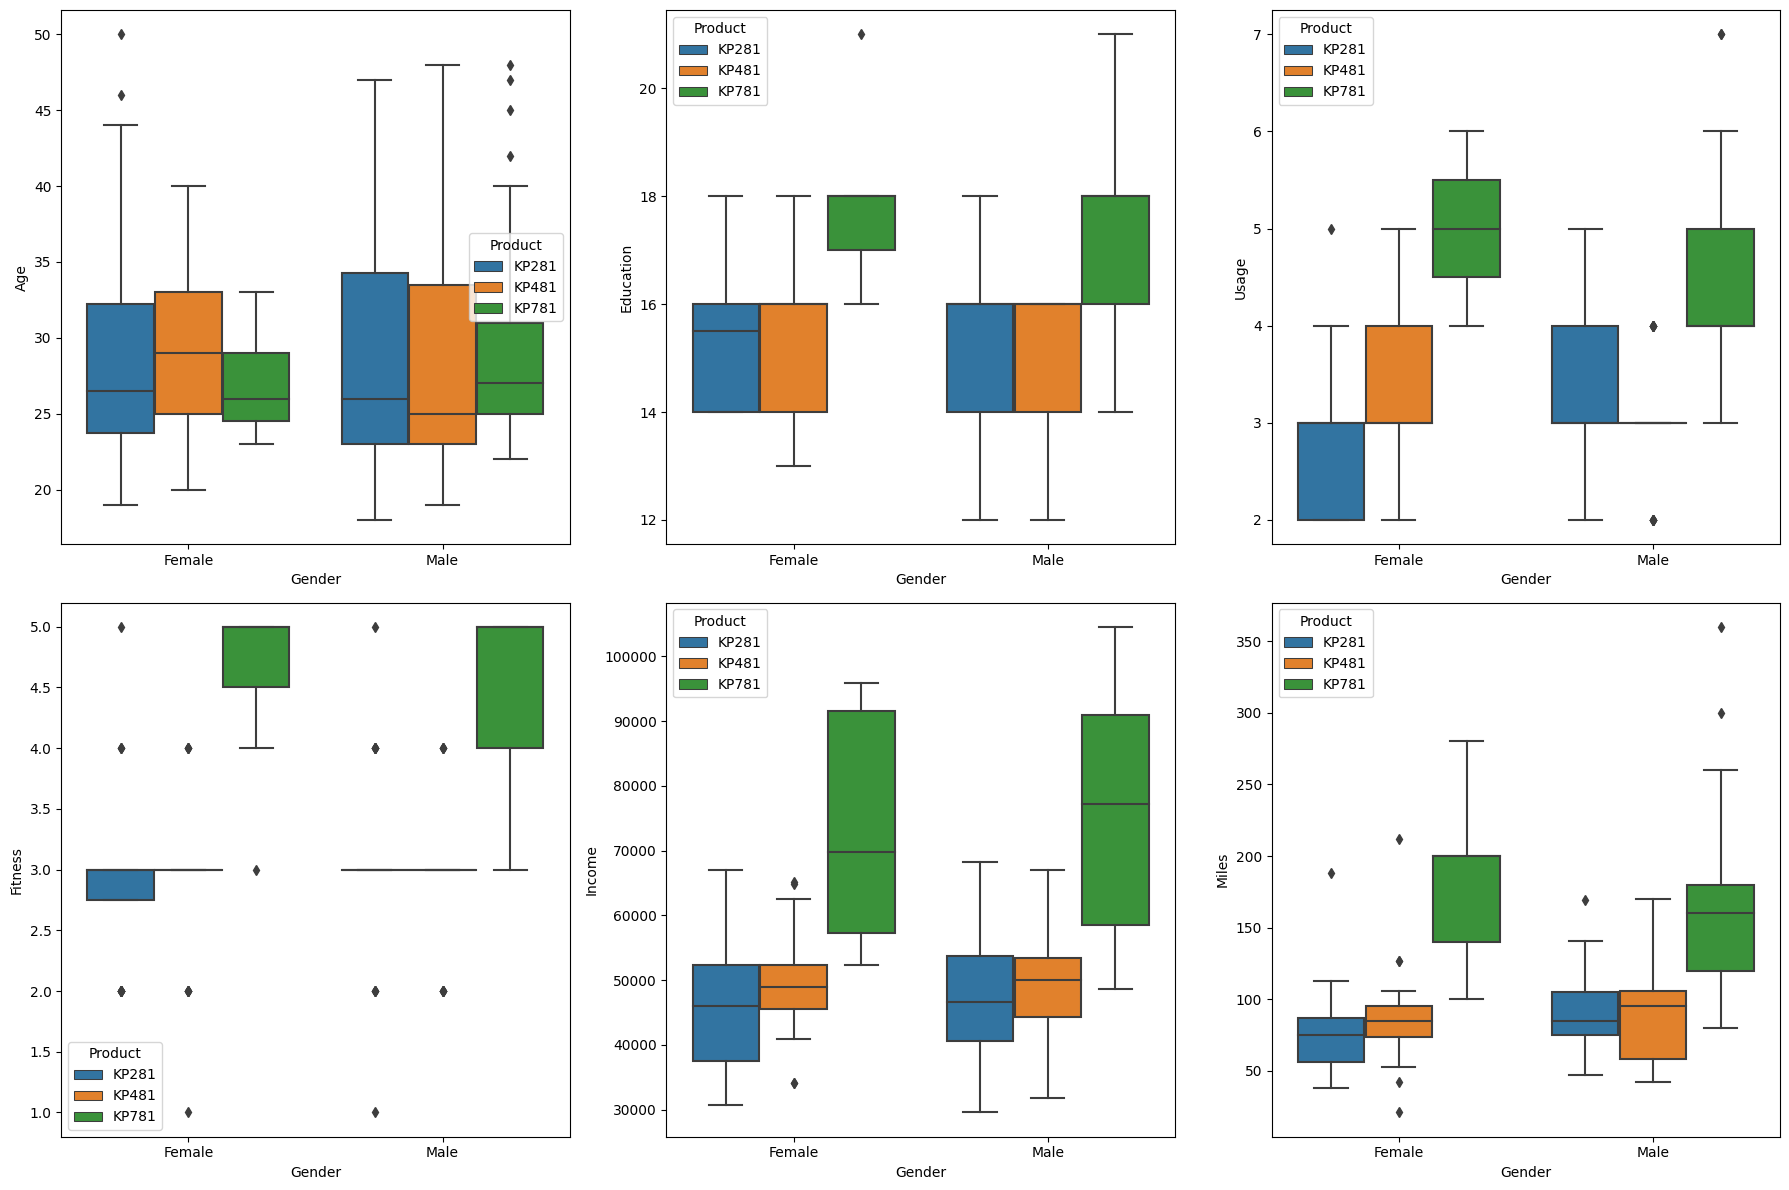

In [108]:
# Gender Variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
sns.boxplot(x="Gender", y="Age", hue='Product',data=df, ax=axes[0, 0])
sns.boxplot(x="Gender", y="Education", hue='Product',data=df, ax=axes[0, 1])
sns.boxplot(x="Gender", y="Usage", hue='Product',data=df, ax=axes[0, 2])
sns.boxplot(x="Gender", y="Fitness", hue='Product',data=df, ax=axes[1, 0])
sns.boxplot(x="Gender", y="Income", hue='Product',data=df, ax=axes[1, 1])
sns.boxplot(x="Gender", y="Miles", hue='Product',data=df, ax=axes[1, 2])
plt.tight_layout()


plt.show()

Insights-

* Both Male and Female has similar ration in terms of purchsing the three products
* Both Male and Female with income > 16 yrs are likely to purchase KP781 product
* Both Male and Female with usaGe planning > 4 are likely to purchase KP781 product
* Female who are planning to use tredmill 3-4 times a week are more likely to purchase KP481
* Both Male and Female fitness above  > 4 are likely to purchase KP781 product
* Both gender with income > 55000 are likely to purchase KP781 product
* Both gender expecting to walk/run > 100 miles per week are more likely to purchase KP781.

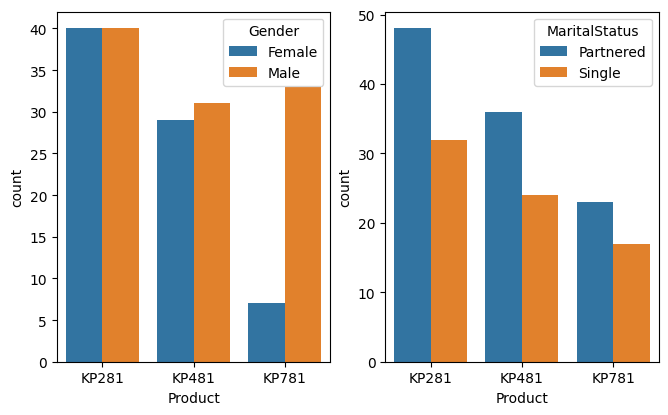

In [109]:
fig=plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
sns.countplot(data=df,x='Product',hue='Gender')


plt.subplot(2,3,2)
sns.countplot(data=df,x='Product',hue='MaritalStatus')

plt.show()


Insights-

* More males are likely to purchase KP781.
* KP281 and KP481 is eqaully purchased by both Male and Female
* More number of purchase is done by partenered customer in all the three product.

### 3.3 For correlation: Heatmaps, Pairplots

In [110]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income Group,Age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Lower,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Lower,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Lower,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Lower,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Lower,Teen
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,High,Middle Aged
176,KP781,42,Male,18,Single,5,4,89641,200,High,Middle Aged
177,KP781,45,Male,16,Single,5,5,90886,160,High,Middle Aged
178,KP781,47,Male,18,Partnered,4,5,104581,120,High,Elder


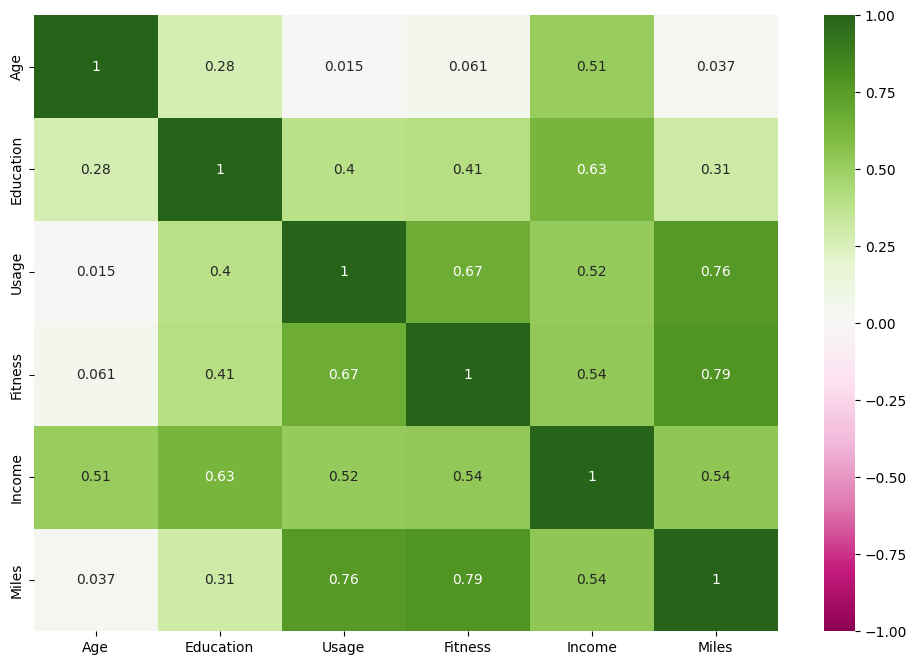

In [111]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax = 1,cmap="PiYG") 
plt.show()

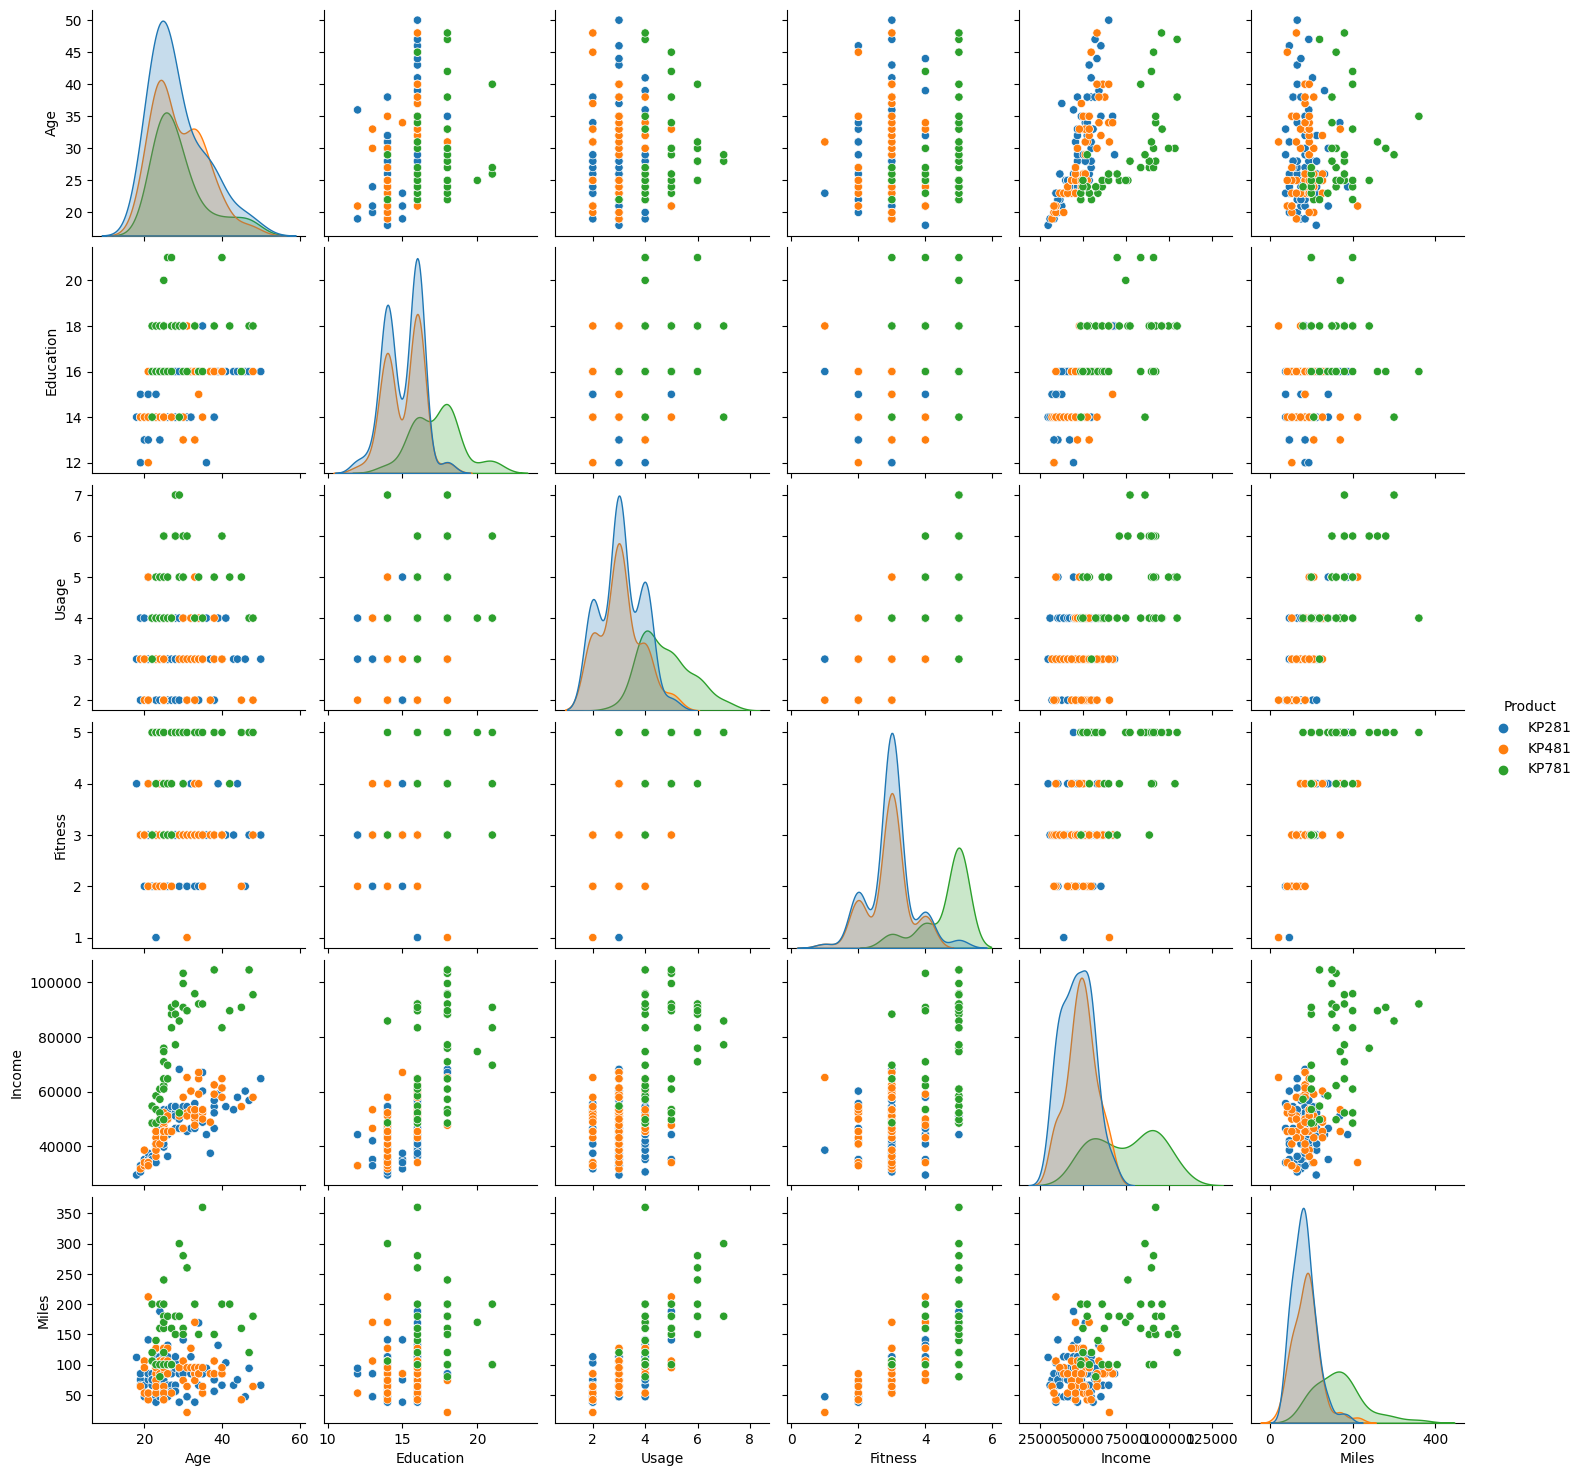

In [112]:
sns.pairplot(df, hue='Product')
plt.show()

Insights:
 
* Miles-Fitness and Miles-Usage are highly correlated. It shows high fitness level people tens to buy use more treadmills.
* Income and education show a strong correlation.
* There is no corelation between Usage & Age or Fitness & Age which means Age should not related  to use treadmills 

## 4. Missing Value & Outlier Detection

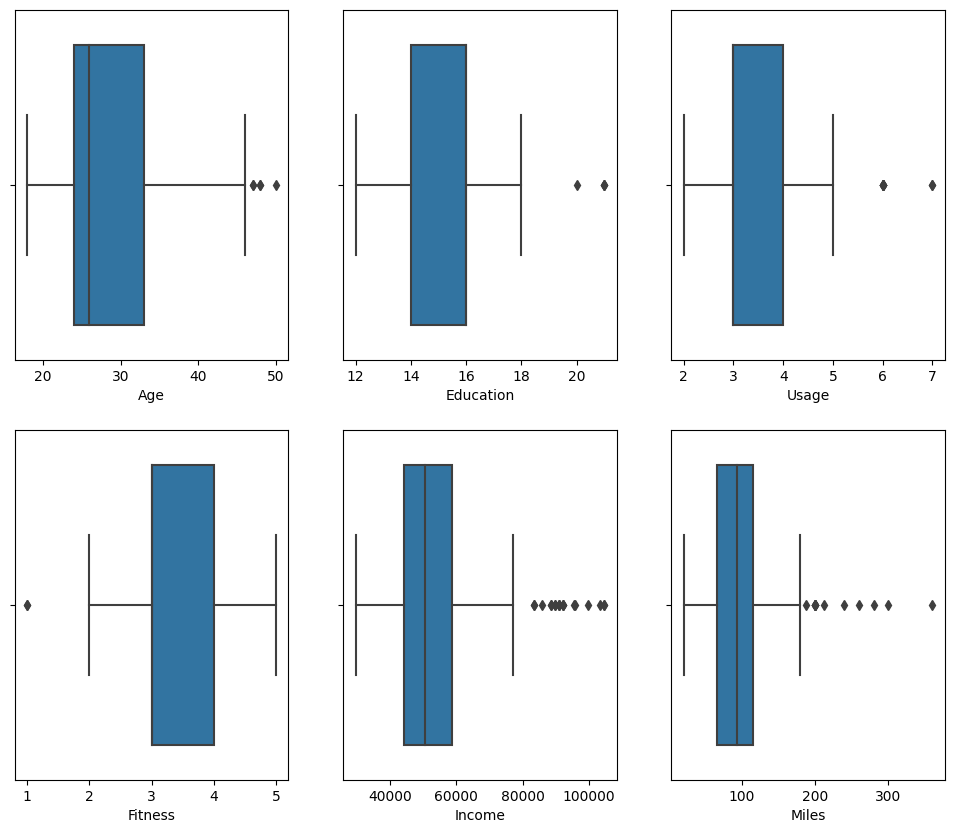

In [113]:
fig=plt.figure(figsize=(12,10))
plt.subplot(2,3,1)
sns.boxplot(data=df,x='Age')

plt.subplot(2,3,2)
sns.boxplot(data=df,x='Education')

plt.subplot(2,3,3)
sns.boxplot(data=df,x='Usage')

plt.subplot(2,3,4)
sns.boxplot(data=df,x='Fitness')

plt.subplot(2,3,5)
sns.boxplot(data=df,x='Income')

plt.subplot(2,3,6)
sns.boxplot(data=df,x='Miles')

plt.show()

Insights-

* There are very less outliers in 'Age','Education','Usage','Fitness' features. 
* There are more outliers in 'Income' and 'Miles' Featues
* These ouliters may provide many insights  that can benefit companies more. Therefore, they should not be removed for further analysis.
* Also as seen earlier there is no missing Values in this Dataset

## Analysis to Calculate Probabilities
## (Marginal Probabilities, Joint Probabilities, Conditional Probabilities)

### Probability of buying KP281, KP481 & KP781


In [114]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

* Probability of buying KP281, KP481 & KP781 are 0.44, 0.33 & 0.22 respectively

### Probability Genderwise

In [115]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

* Probability of Male customer is 0.57 and Female customer is 0.42

### Probability of Customer w.r.t. Marital Status

In [116]:
df['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

* Probability of Married/Partnered purchasing tredmill is 0.59 and for  Single is 0.40

### Conditional, Marginal & Joint Probabilities

#### product type and age group

In [117]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [118]:
#marginal probability
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


Marginal Probability

* Probability of Male Customer Purchasing any product is : 57.77 %

* Probability of Female Customer Purchasing any product is : 42.22 %

Marginal Probability of customer buying

* product KP281 is : 44.44 % 

* product KP481 is : 33.33 % 

* product KP781 is : 22.22 % 

In [119]:
#conditional probabilities
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


Probability of Selling Product vs Gender

* KP281 | Female = 52 %

* KP481 | Female = 38 %

* KP781 | Female = 10 %

* KP281 | male = 38 %

* KP481 | male = 30 %

* KP781 | male = 32 %

* Probability of Female customer buying KP281(52.63%) is significantly more than male(38.46%).

* KP281 is more recommended for female customers.

* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

* KP781 is more recommended for male customers.

* Probability of Female customer buying Product KP481(38.15%) is  higher than male (29.80%. )

* KP481 product is specifically recommended for Female customers who are intermediate user.

In [120]:
# joint probabilities
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize=True))*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


* KP281 & Female = 22 %

* KP481 & Female = 16 %

* KP781 & Female = 4 %

* KP281 & male = 22 %

* KP481 & male = 17 %

* KP781 & male = 18 %



#### Conditional and Marginal Probabilities with product type and MaritalStatus

In [121]:
#marginal probabilities
np.round(((pd.crosstab(df.Product,df.MaritalStatus,margins=True))/180)*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.67,17.78,44.44
KP481,20.00,13.33,33.33
KP781,12.78,9.44,22.22
All,59.44,40.56,100.00


Marginal Probability

* Probability of Partnered Customer Purchasing any product is : 59.44 %

* Probability of Single Customer Purchasing any product is : 40.56 %

In [122]:
#conditional probabilities
np.round((pd.crosstab([df.Product],df.MaritalStatus,margins=True,normalize="columns"))*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,44.86,43.84,44.44
KP481,33.64,32.88,33.33
KP781,21.50,23.29,22.22


Probability of Selling Product vs Marital Status

* KP781|single = 23%
* KP481|single = 33%
* KP281|single = 44%
* KP781|partnered = 21%
* KP481|partnered = 34%
* KP281|partnered = 45%

* Probability of both Single and Partnered customer is almost similar. We cannot recommened any particular product.However we can explore further on this

In [123]:
#joint probabilities
np.round((pd.crosstab([df.Product],df.MaritalStatus,margins=True,normalize=True))*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.67,17.78,44.44
KP481,20.00,13.33,33.33
KP781,12.78,9.44,22.22
All,59.44,40.56,100.00


### Conditional , Marginal and Joint Probabilities with product type and age group

In [124]:
pd.crosstab(index=df['Product'],columns=[df['Age_group']],margins=True)

Age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


In [125]:
## Marginal probabilities
np.round(((pd.crosstab(index=df['Product'],columns=[df['Age_group']],margins=True))/180)*100,2)

Age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,5.56,31.11,6.11,1.67,44.44
KP481,3.89,25.00,3.89,0.56,33.33
KP781,0.00,18.89,2.22,1.11,22.22
All,9.44,75.00,12.22,3.33,100.00


Marginal Probability

* Probability of Teen Customer Purchasing any product is : 9.44 %

* Probability of Adult Customer Purchasing any product is : 75 %
    
* Probability of Middle Aged Customer Purchasing any product is : 12.22 %

* Probability of Elder Customer Purchasing any product is : 3.33 %


In [126]:
#conditional probilities
np.round(pd.crosstab(index=df['Product'],columns=[df['Age_group']],normalize='columns',margins=True),2)


Age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,0.59,0.41,0.50,0.50,0.44
KP481,0.41,0.33,0.32,0.17,0.33
KP781,0.00,0.25,0.18,0.33,0.22


In [127]:
# joint probabilities
np.round(pd.crosstab(index=df['Product'],columns=[df['Age_group']],normalize=True,margins=True),2)

Age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,0.06,0.31,0.06,0.02,0.44
KP481,0.04,0.25,0.04,0.01,0.33
KP781,0.00,0.19,0.02,0.01,0.22
All,0.09,0.75,0.12,0.03,1.00


In [128]:
round(pd.crosstab(index=[df.Product,df.MaritalStatus],columns=df.Gender,margins=True,normalize=True),2)

Gender                 Female  Male   All
Product MaritalStatus                    
KP281   Partnered        0.15  0.12  0.27
        Single           0.07  0.11  0.18
KP481   Partnered        0.08  0.12  0.20
        Single           0.08  0.06  0.13
KP781   Partnered        0.02  0.11  0.13
        Single           0.02  0.08  0.09
All                      0.42  0.58  1.00

### Conditional , Marginal and Joint Probabilities with product type and income group

In [129]:
pd.crosstab(index=df['Product'],columns=[df['Income Group']],margins=True)

Income Group,Lower,Lower_Middle,Upper_Middle,High,All
Product,,,,,
KP281,23,51,6,0,80
KP481,9,44,7,0,60
KP781,0,11,10,19,40
All,32,106,23,19,180


In [130]:
## Marginal probabilities
np.round(((pd.crosstab(index=df['Product'],columns=[df['Income Group']],margins=True))/180)*100,2)

Income Group,Lower,Lower_Middle,Upper_Middle,High,All
Product,,,,,
KP281,12.78,28.33,3.33,0.00,44.44
KP481,5.00,24.44,3.89,0.00,33.33
KP781,0.00,6.11,5.56,10.56,22.22
All,17.78,58.89,12.78,10.56,100.00


In [131]:
#conditional probilities
np.round(pd.crosstab(index=df['Product'],columns=[df['Income Group']],normalize='columns',margins=True),2)

Income Group,Lower,Lower_Middle,Upper_Middle,High,All
Product,,,,,
KP281,0.72,0.48,0.26,0.0,0.44
KP481,0.28,0.42,0.30,0.0,0.33
KP781,0.00,0.10,0.43,1.0,0.22


In [132]:
#joint probilities
np.round(pd.crosstab(index=df['Product'],columns=[df['Income Group']],normalize=True,margins=True),2)

Income Group,Lower,Lower_Middle,Upper_Middle,High,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


### Customer profiling based on the products

KP281

* This is the most popular prodcut having 44% sale of the total sale

* Most affrodable product amonng all the three products

* Age group who buys this product is in the range of 23yrs-33 yrs.

* Customers having education from 14 yrs upto 16 yrs buys this product

* Customer usage plan 3-4 times a week are more likely to purchase KP281

* Male usage plan 3-4 time as week and female usage plan of 2-3 times a week are more likely to purchase KP281

* Customer having income between 38000-55000 more likely to purchase KP281

* Male with income range 42000-52000 and female with income range 38000 and 52000 are more likely to purchase KP281

* Customer expecting to walk/run 60-95 miles per week are more likely to purchase KP281

* Male expecting to walk/run 60-100 miles per week and female expecting to walk/run 60-80 are more likely to purchase KP281

* KP281 is eqaully purchased by both Male and Female

* Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

* KP281 is more recommended for female customers.

* Younger to Elder beginner level customers prefer this product.

KP481

* KP481 is the second most popular product among the customershaving 33% sale.
* Mid range product amonng all the three products
* Customer expecting to walk/run 70-125 miles per week are more likely to purchase KP481
* More partnered customers prefer this product than single.
* Probability of Female customer buying Product KP481(38.15%) is higher than male (29.80%. )
* Three different age groups prefer this product - Teen, Adult and middle aged.
* Average Income of the customer who buys KP481 is 49000.
* Customer usage plan 3 times a week are more likely to purchase KP481
* Customer expecting to walk/run 75-100 miles per week are more likely to purchase KP481
* The age range of KP481 treadmill customers is roughly between 24-34 years.

KP781

* Least purchased product mainly due to high price
* Customer expecting to walk/run > 100 miles per week are more likely to purchase KP781
* Customer usage plan 4-5 times a week are more likely to purchase KP781
* This product is preferred by the customer where the correlation between Education and Income is High.
* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).
* Probability of a single person buying KP781 is higher than partnered customers
* Average Income of the customer who buys KP781 is > 70000.
* Partnered Female bought KP781 treadmill compared to Partnered Male


Recommendation


* 58% of customers are Male and 42% customers are Female. Hence to increase the acquisation of female customers, company can make any female athelete as brand ambassdor to promote and encourage for females to buy this products
* As single customeras are less comapartively with partnered, Company, shall share success stories of single people  to enocourage more and more single customers
* Customers above 40 yrs is very less comparatively. So company should target > 40 yrs customers by giving any discount or offers as these customers are not so health concious people
* KP781 product should be promotted famous atheletes so that professionals and athelets are targeted to purchase this product.Also by this company can also  targeted the high income customers to purchase this product.
* Existing customers can be contacted for upgrading the product variant with some offers or exchange offers.
* Organise promotional events like cycling/marathon etc for more customer reach

